<a href="https://colab.research.google.com/github/LordLean/sharing-github/blob/master/Neural_Networks/SimpleNN/DigitRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# -http://neuralnetworksanddeeplearning.com/chap1.html

import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork:

	def __init__(self, layer_sizes):
		weight_shapes = [(a,b) for a,b in zip(layer_sizes[1:],layer_sizes[:-1])]
		self.weights = [np.random.standard_normal(s)/s[1]**.5 for s in weight_shapes]
		self.biases = [np.zeros((s,1)) for s in layer_sizes[1:]]


	def predict(self, a):
		for w,b in zip(self.weights,self.biases):
			a = self.activation(np.matmul(w,a) + b)
		return a


	def print_accuracy(self,images,labels):
		predictions=self.predict(images)
		num_correct=sum([np.argmax(a)==np.argmax(b) for a,b in zip(predictions,labels)])
		print("{0}/{1} accuracy: {2}%".format(num_correct,len(images),(num_correct/len(images))*100))


	@staticmethod
	def activation(x):
		return 1/(1+np.exp(-x))

In [124]:
layer_sizes = (784,5,10)
x = np.ones((layer_sizes[0],1))

net = NeuralNetwork(layer_sizes)
prediction = net.predict(x)

print(prediction)

[[0.76601197]
 [0.26383516]
 [0.62394212]
 [0.62085707]
 [0.62428644]
 [0.68994877]
 [0.66997532]
 [0.47366702]
 [0.06839711]
 [0.65442144]]


In [20]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
uploaded['mnist.npz']

Saving mnist.npz to mnist.npz
User uploaded file "mnist.npz" with length 22247690 bytes


In [0]:
with np.load('mnist.npz') as data: 
	training_images = data['training_images']
	training_labels = data['training_labels']

In [48]:
print(training_images.shape)
print(training_labels.shape)

(50000, 784, 1)
(50000, 10, 1)


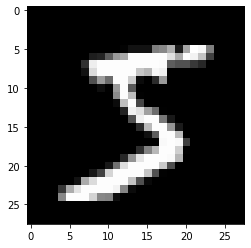

In [52]:
plt.imshow(training_images[0].reshape(28,28), cmap="gray")

In [98]:
prediction = net.predict(training_images)
print(np.where(prediction[0]==num))
print(prediction[0])

(array([4]), array([0]))
[[0.27007868]
 [0.38271046]
 [0.21732857]
 [0.38895639]
 [0.66006009]
 [0.32545494]
 [0.32965924]
 [0.45565972]
 [0.47342734]
 [0.56847758]]


In [99]:
# - Convert to python list
prediction[0].flatten().tolist()

[0.2700786797829212,
 0.38271046190448327,
 0.21732856808964646,
 0.3889563887382428,
 0.6600600894118062,
 0.32545494493891935,
 0.3296592395272673,
 0.4556597227814535,
 0.4734273427935373,
 0.5684775751734696]

In [100]:
print(np.argmax(prediction[0]))

4


In [125]:
net.print_accuracy(training_images,training_labels)

4932/50000 accuracy: 9.864%
